# Regresión logística - Implementación

## Función logística

$\frac{1}{1 + e^(-x)} $

## Formula 

$ y = \frac{1}{1 + e^{(-\theta_0 + \theta_1 x)}}$

In [1]:
# Librerias
import matplotlib.pyplot as plt
import numpy as np
import math as math
from sklearn.model_selection import train_test_split

In [2]:
def logistic(x):
    res = 1 / (1 + np.exp(-1 * x))
    return res

In [3]:
# Datos dummy
np.random.seed(2)
m = 40
X = np.random.random([m,1])
Y = np.random.choice([0, 1], size=(m,))

for i in range(m):
    if X[i,0] >= 0.6:
        Y[i] = 1
    else:
        Y[i] = 0

In [4]:
# Generar datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
y_train = y_train.reshape(-1,1)

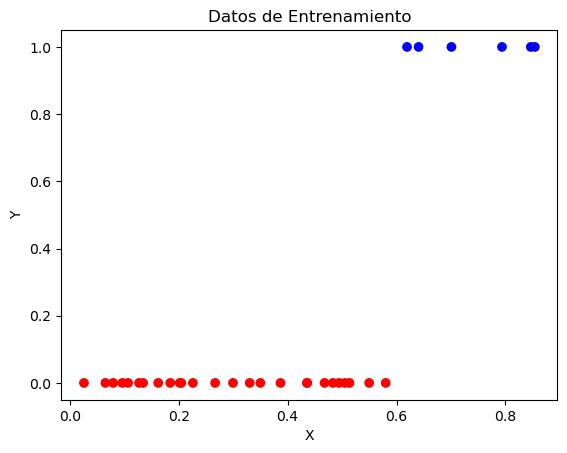

In [5]:
# Visualizar datos de entrenamiento
colors=['red' if i==0 else 'blue' for i in y_train]
ax=plt.gca()
ax.scatter(X_train, y_train, c=colors)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Datos de Entrenamiento")
plt.show()

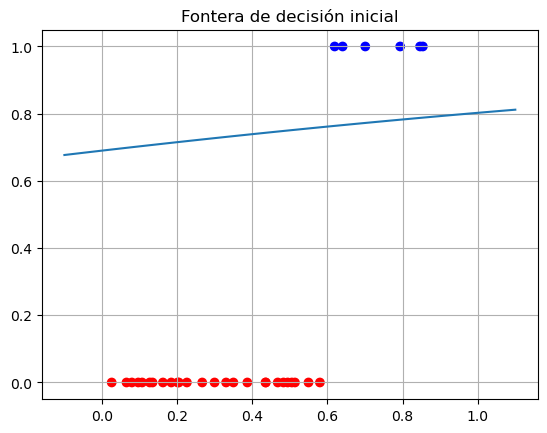

In [6]:
# Inicializar
alpha  = 0.2  # Tasa de aprendizaje 
theta0 = np.random.rand()
theta1 = np.random.rand()
maxItera = 10000
i = 0

#para observar el progreso de los parametros abajo 
log0,log1=np.array([theta0]),np.array([theta1])

#para graficar el costo
logE=np.array([])


# Initial approximation
xrange = np.linspace(-0.1,1.1,100)
log2 = logistic(theta0 + theta1*xrange)
ax=plt.gca()
ax.scatter(X_train, y_train, c=colors)
plt.plot(xrange,log2)
plt.grid()
plt.title("Fontera de decisión inicial")
plt.show()

In [7]:
# Ajuste de parámetros - Aprendizaje DG
while i < maxItera:
    # Observar
    T  = theta0 + theta1 * X_train
    yH = logistic(T)
    E  = yH - y_train
    
    # Costo
    c1    = y_train * np.log(yH)
    c2    = (1 - y_train) * np.log(1 - yH)
    Costo = -1 * (1/m) * sum (c1 + c2)
    
    # Actualizar
    newT0 = theta0 - alpha * (1/m) * sum(E)
    newT1 = theta1 - alpha * (1/m) * sum(E * X_train)
    
    theta0, theta1 = newT0, newT1
    
    log0 = np.append(log0,theta0)
    log1 = np.append(log1,theta1)
    logE = np.append(logE,Costo)
    
    i+= 1     

In [10]:
[theta0, theta1, i]

[array([-10.19867362]), array([16.46257392]), 10000]

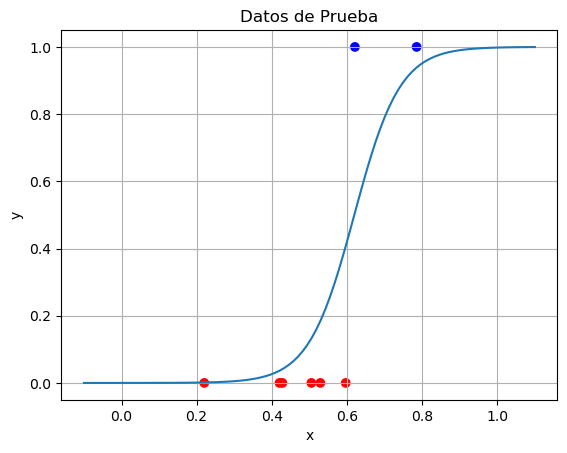

In [11]:
# Aproximación final
colors=['red' if i==0 else 'blue' for i in y_test]
ax=plt.gca()
ax.scatter(X_test, y_test, c=colors)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Datos de Prueba")
xnew = np.linspace(-0.1,1.1,100)
log2 = logistic(theta0 + theta1*xnew)
plt.plot(xnew,log2)
plt.grid()
plt.show()

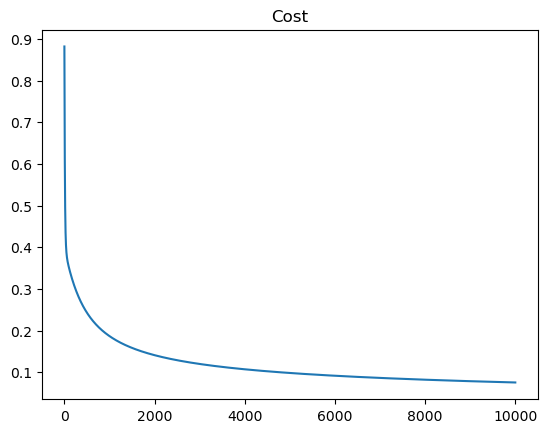

In [12]:
plt.plot(logE)
plt.title("Cost")
plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression
m1 = LogisticRegression(random_state=0,max_iter=100000).fit(X_train, y_train.ravel())
print(m1.predict(X_test))

[0 0 0 0 0 0 0 0]


In [16]:
# Predicciones
y_pred = []

for x in X_test:
    prob = logistic(theta0 + theta1 * x)
    # print(prob)
    if (prob >= 0.5):
        # El objeto es de clase 1
        y_pred.append(1)
    else:
        y_pred.append(0)

    

In [17]:
y_pred

[0, 0, 0, 0, 1, 1, 0, 0]

In [18]:
X_test

array([[0.42812233],
       [0.50524609],
       [0.59674531],
       [0.4203678 ],
       [0.62113383],
       [0.78533515],
       [0.22030621],
       [0.52914209]])